In [1]:
from helpers import * 
from boundaries import *
from augment import *
from processor import *

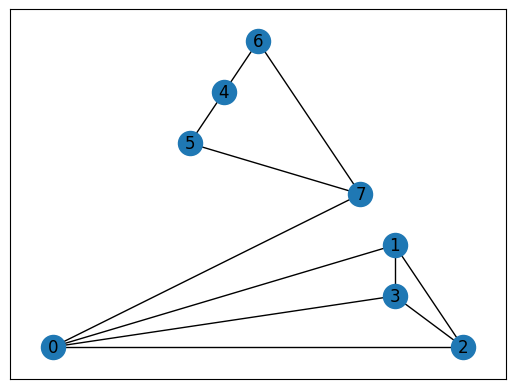

In [2]:
G_st = st_graph()   
plot_planar(G_st)

ic| cut_vertices: [7, 0]


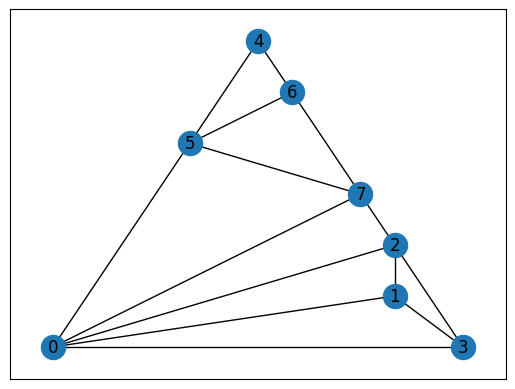

In [3]:
p = Processor(G_st)
p.augment()
pos = plot_planar(p.G, p.embed)

In [4]:
p.G.edges

EdgeView([(0, 1), (0, 3), (0, 2), (0, 7), (0, 5), (1, 2), (1, 3), (2, 3), (2, 7), (4, 5), (4, 6), (5, 7), (5, 6), (6, 7)])

ic| tri.target_edge: (2, 3)
ic| 'neither same'
ic| len(l3_cycles): 8, m: 16, n: 9, m-n+1: 8


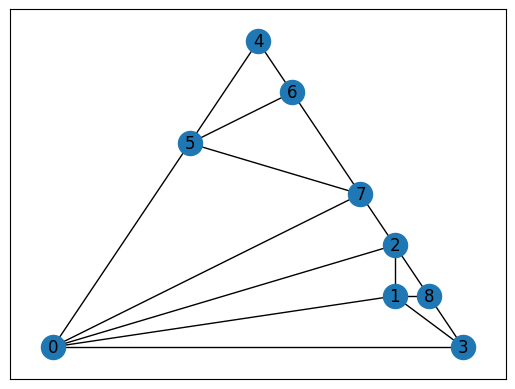

In [5]:
p.fix_separating_triangles()
plot_planar(p.G, p.s.embed)

In [7]:
p.find_cips()
p.b.cips

[[0, 3, 8, 2], [5, 4, 6]]

In [8]:
p.start_four_connect()

ic| end_indices: [3, 5, 7, 9]


In [9]:
p.b.four_con

{0: [0, 3, 8], 1: [8, 2, 6], 2: [6, 4, 5], 3: [5, 0]}

### four connection 

In [ ]:
G = p.G
boundary = p.b.boundary_nodes
cips = p.b.cips
n = len(G.nodes)
ic(boundary, cips, n);

ic| boundary: array([0, 3, 5, 4, 2, 6, 7, 8])
    cips: [[0, 3, 8, 2], [4, 5, 6]]
    n: 9


In [ ]:
# basicaly, organize the cips so that the alignment matches up with the boundary cycle 
n_cips = total_length(cips)
boundary_cycles =  []
for c in nx.simple_cycles(p.b.boundary_graph, n_cips+1):
    if len(c) >= n_cips+1:
        boundary_cycles.append(c)

boundary_cycles = boundary_cycles[0]

cip_nodes = [item for sublist in cips for item in sublist]
diff = (list(set(boundary_cycles).difference(set(cip_nodes))))
for d in diff:
    boundary_cycles.remove(d)



In [ ]:
four_dist(boundary_cycles)

ic| end_indices: [3, 5, 7, 9]


{0: [0, 3, 8], 1: [8, 2, 6], 2: [6, 5, 4], 3: [4, 0]}

In [ ]:
# my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# # random.shuffle(my_list)

# boundary_cycles = my_list
# print(len(boundary_cycles))
# boundary_cycles


In [ ]:
def four_dist0(boundary_cycles):
    num_connect = 4 #ewswn
    j = (len(boundary_cycles) // (num_connect -1)) + 1
    
    end_indices = [j*(i+1) - i for i in range(num_connect - 1)]
    ic(end_indices)
    four_con = {}
    for ix, end_index in enumerate(end_indices):
        four_con[ix] = boundary_cycles[end_index-j:end_index]

    leftover = len(boundary_cycles) - four_con[ix][-1]

    k = len(boundary_cycles) % (num_connect - 1)
    ic(j, k, len(boundary_cycles), leftover);
    four_con[ix+1] = [boundary_cycles[-k], boundary_cycles[0]]
    return four_con

In [ ]:
def four_dist(boundary_cycles):
    wrap_list = boundary_cycles #+ [boundary_cycles[0]]
    num_connect = 4 #ewswn
    j = (len(boundary_cycles) // (num_connect -1)) + 1
    
    end_indices = [j*(i+1) - i for i in range(num_connect )]
    ic(end_indices)
    four_con = {}
    for ix, end_index in enumerate(end_indices):
        four_con[ix] = wrap_list[end_index-j:end_index]
        
    if len(four_con[3]) < 2:
        four_con[3] = [boundary_cycles[-1], boundary_cycles[0]]


    # k = len(boundary_cycles) % (num_connect - 1)
    # ic(j, k, len(boundary_cycles), leftover);
    # four_con[ix+1] = [boundary_cycles[-k], boundary_cycles[0]]
    return four_con

In [ ]:
# TODO save these experiments that show the behavior .. 
print(four_dist(list(range(4))))
print(four_dist(list(range(8))))
print(four_dist(list(range(12))))


ic| end_indices: [2, 3, 4, 5]
ic| end_indices: [3, 5, 7, 9]
ic| end_indices: [5, 9, 13, 17]


{0: [0, 1], 1: [1, 2], 2: [2, 3], 3: [3, 0]}
{0: [0, 1, 2], 1: [2, 3, 4], 2: [4, 5, 6], 3: [6, 7]}
{0: [0, 1, 2, 3, 4], 1: [4, 5, 6, 7, 8], 2: [8, 9, 10, 11], 3: [11, 0]}


In [ ]:
print(four_dist(list(range(3))))
print(four_dist(list(range(7))))
print(four_dist(list(range(11))))

ic| end_indices: [2, 3, 4, 5]
ic| end_indices: [3, 5, 7, 9]
ic| end_indices: [4, 7, 10, 13]


{0: [0, 1], 1: [1, 2], 2: [2], 3: [2, 0]}
{0: [0, 1, 2], 1: [2, 3, 4], 2: [4, 5, 6], 3: [6, 0]}
{0: [0, 1, 2, 3], 1: [3, 4, 5, 6], 2: [6, 7, 8, 9], 3: [9, 10]}


In [ ]:
print(four_dist(list(range(2))))
print(four_dist(list(range(6))))
print(four_dist(list(range(10))))

ic| end_indices: [1, 1, 1, 1]
ic| end_indices: [3, 5

{0: [0], 1: [0], 2: [0], 3: [1, 0]}


, 7, 9]
ic| end_indices: [4, 7, 10, 13]


{0: [0, 1, 2], 1: [2, 3, 4], 2: [4, 5], 3: [5, 0]}
{0: [0, 1, 2, 3], 1: [3, 4, 5, 6], 2: [6, 7, 8, 9], 3: [9, 0]}


### 4-completion

In [ ]:
def four_completion(G, boundary, cips):
    if len(boundary) == 3:
        v1, v2, v3 = boundary
        corner_points = boundary
    else:
        
        if n < 4:
            for i in range(n+1, 4):
                pass 
    
